Importing libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Importing Dataset

In [7]:
df=pd.read_csv(r'diwali_sales_data.csv',encoding='unicode_escape')


Summarization of data

In [8]:
df.shape

(11251, 15)

In [9]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN


Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [11]:
#abode status and unnamed columns hav 0 values so delete them(use drop function)
#axis=1 means to delete the whole column
df.drop(['Status','unnamed1'],axis=1,inplace=True)
#inplace is used to save the changes

In [12]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
df.dropna(inplace=True) #drop null values

In [14]:
#to change data type
df['Amount']=df['Amount'].astype('int')

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
#to change a column name
df.rename(columns={'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [17]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


**EDA**- Exploratory Data Analysis

Gender

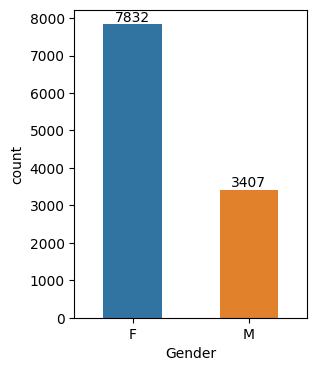

In [18]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x='Gender',data=df,width=0.5,)
for bars in ax.containers:
  ax.bar_label(bars)

In [19]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

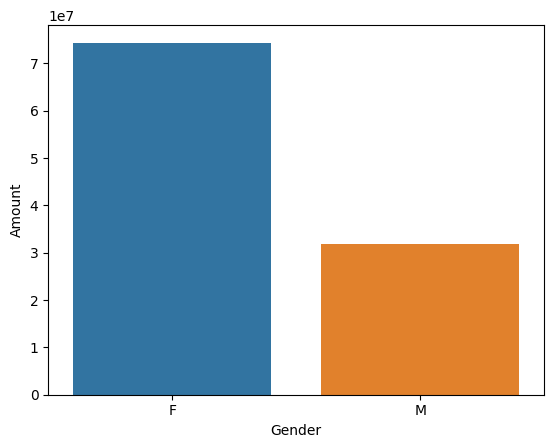

In [26]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

Age

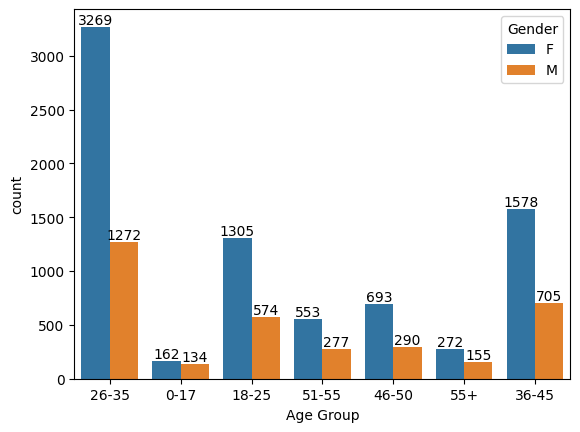

In [29]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

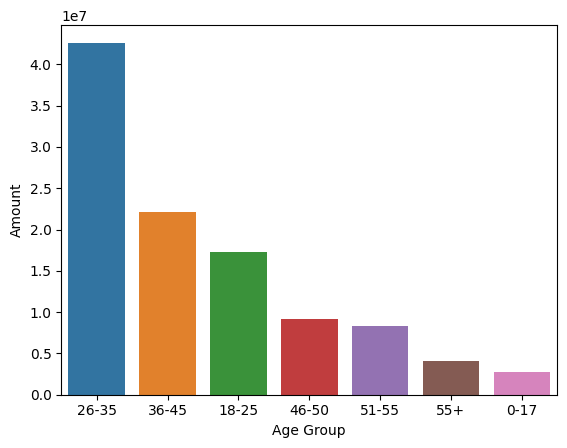

In [30]:
sales_gen=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_gen)

State

<Axes: xlabel='State', ylabel='Orders'>

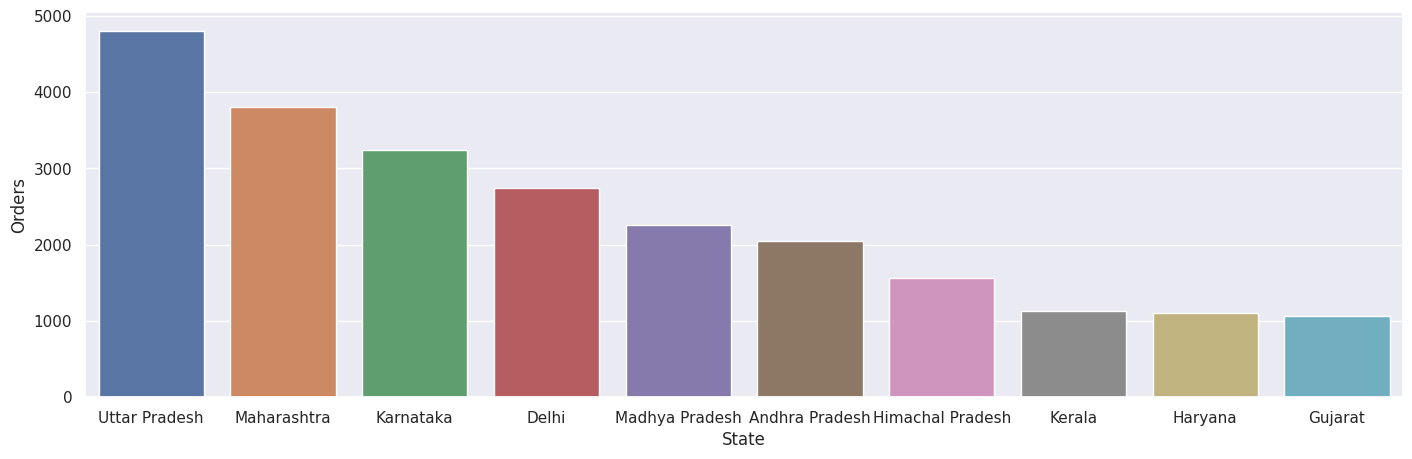

In [37]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

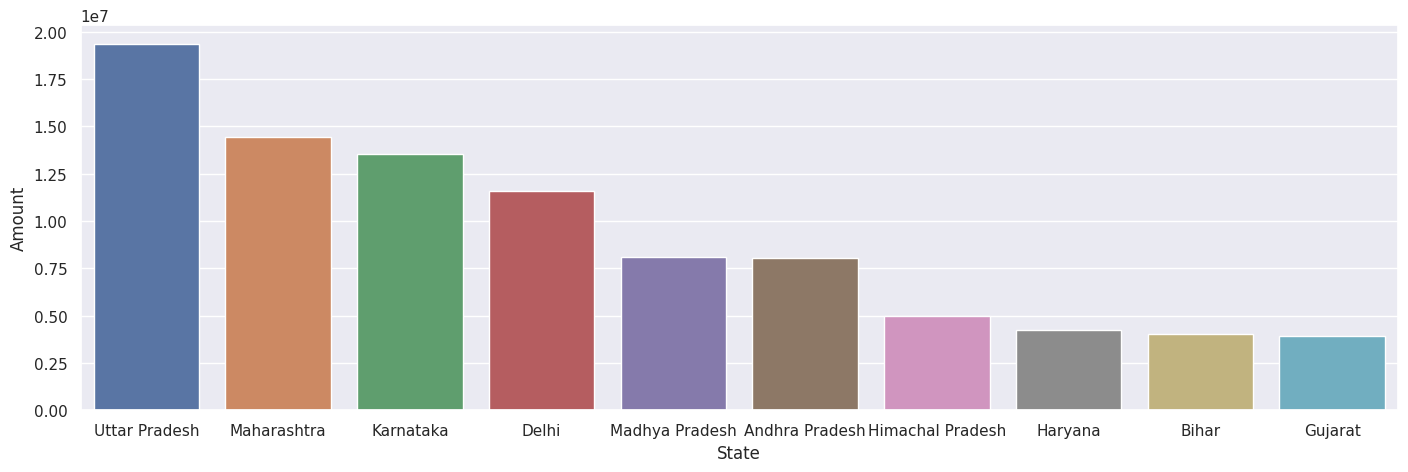

In [39]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

Marital Status

<Axes: xlabel='Marital_Status', ylabel='Amount'>

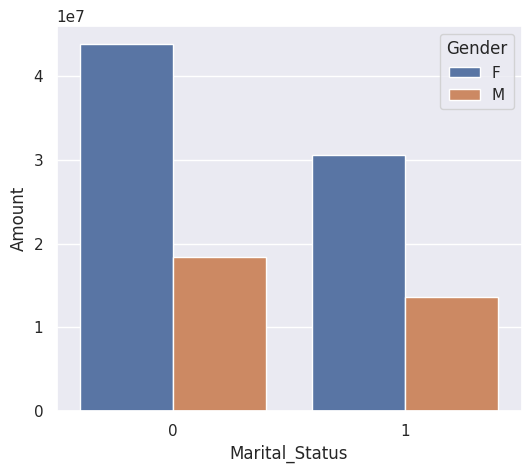

In [40]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')


Occupation

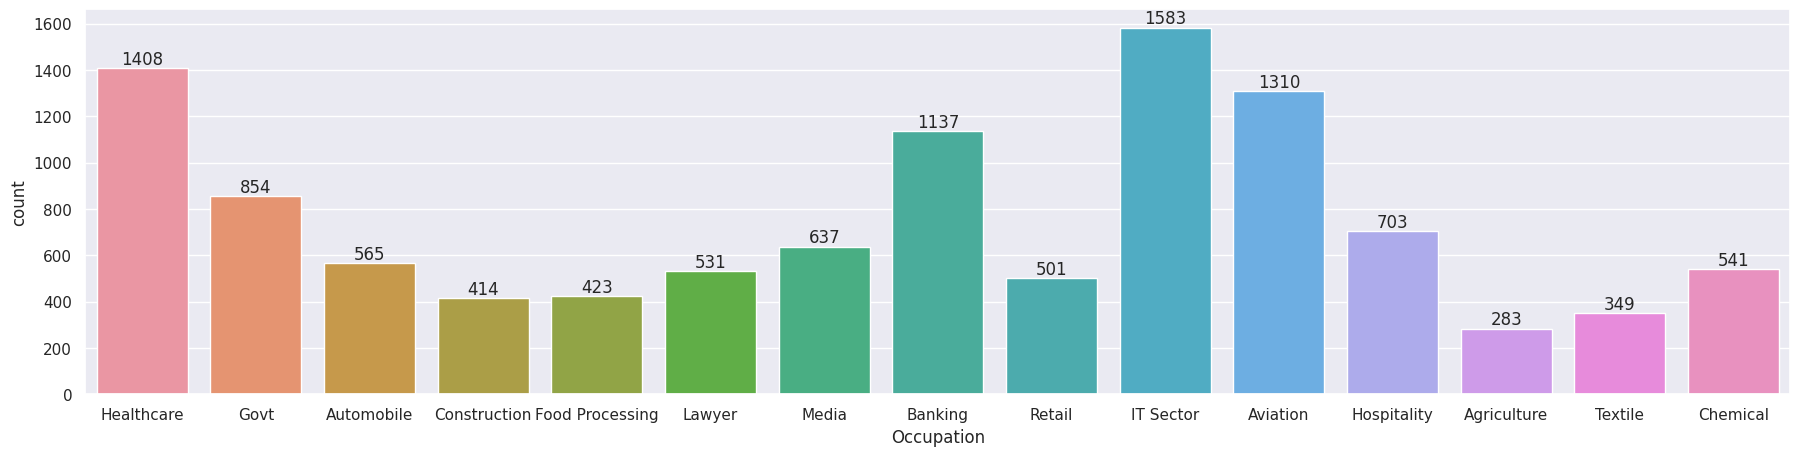

In [42]:
sns.set(rc={'figure.figsize':(22,5)})
ax = sns.countplot(data = df, x = 'Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

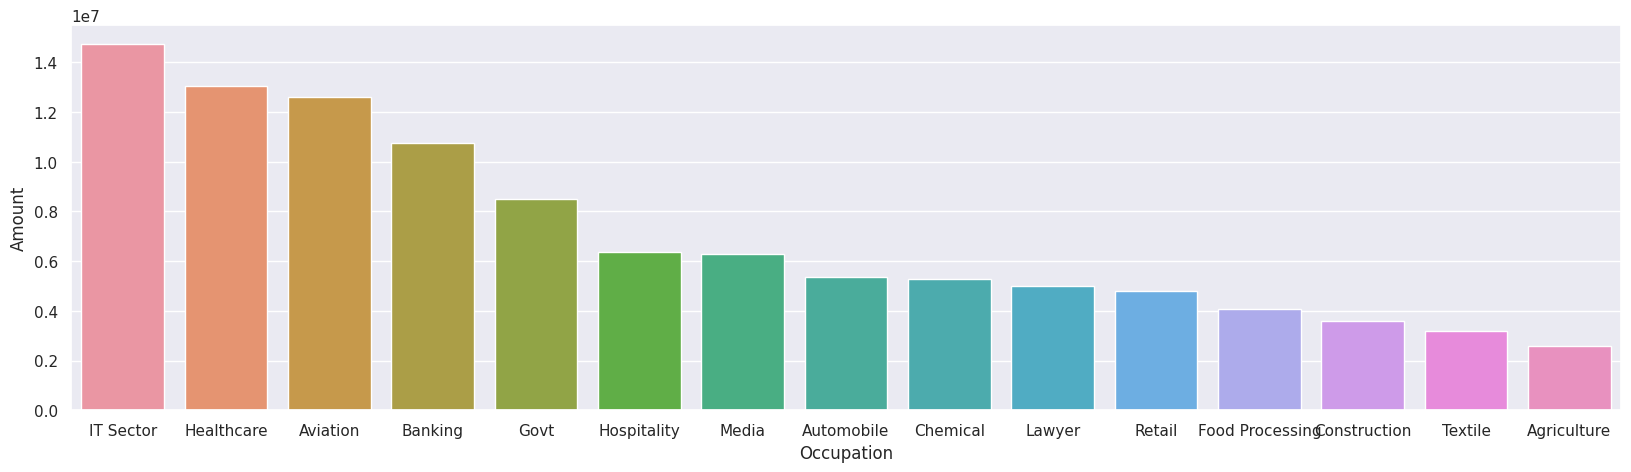

In [43]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

Conclusion

Married women age group 26-35 years from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products.